In [51]:
# September 16, 2017
# Udemy Machine Learning A-Z
# SVR

In [52]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import pandas as pd

In [53]:
# Import Data

positionsalaries = pd.read_csv('Position_Salaries.csv')

positionsalaries.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [54]:
x = positionsalaries.iloc[:, -2].values # : - 1, means all but last column
y = positionsalaries.iloc[:, -1].values # -1 means last column

In [55]:
x = x.reshape(-1, 1) # reshape into matrix

x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [56]:
# Feature Scaling
# initial SVR resulted in a straight line at ~130,000
# SVR is one of the algorithms that does not automatically do feature scaling

from sklearn.preprocessing import StandardScaler

scalex = StandardScaler()
scaley = StandardScaler()

x = scalex.fit_transform(x)
y = scaley.fit_transform(y)

# will result in warning
# according to video, that's fine: the warning is telling us that we used to have integers, now we have float

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [57]:
# SVR Library

from sklearn.svm import SVR

svrreg = SVR(kernel = 'rbf') # default kernel is rbf, which is the Gaussian kernel

In [58]:
svrreg.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
ypred = svrreg.predict(6.5)

ypred

array([ 0.01158103])

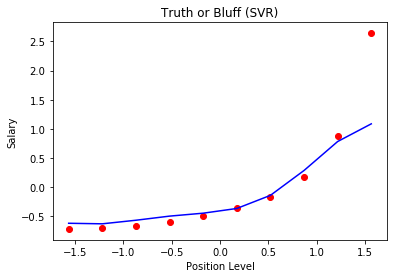

In [61]:
# Visualize Results

plt.scatter(x, y, color = 'red')

plt.plot(x, svrreg.predict(x), color = 'blue')

plt.title('Truth or Bluff (SVR)')

plt.xlabel('Position Level')

plt.ylabel('Salary')

# According to video, poorly fitted CEO value is okay b/c SVR considers it an outlier

In [67]:
# ypred = svrreg.predict(6.5) # Need to transform 6.5
# ypred = svrreg.predict(scalex.transform(6.5)) # still not good enough, need to convert to array
# ypred = svrreg.predict(scalex.transform(np.array([6.5]))) # need to get inverse of prediction

ypred = scaley.inverse_transform(svrreg.predict(scalex.transform(np.array([6.5]))))

ypred

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 170370.0204065])

In [69]:
# Plot Smoother SVR

xgrid = np.arange(min(x),
                  max(x),
                  0.1)

xgrid = xgrid.reshape(-1, 1)

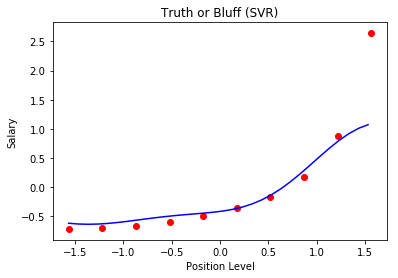

In [71]:
# Visualize Results

plt.scatter(x, y, color = 'red')

plt.plot(xgrid, svrreg.predict(xgrid), color = 'blue')

plt.title('Truth or Bluff (SVR)')

plt.xlabel('Position Level')

plt.ylabel('Salary')

# According to video, poorly fitted CEO value is okay b/c SVR considers it an outlier